# Problem 2

In [20]:
#load libraries
import numpy as np
from matplotlib import pyplot as plt 
import pandas as pd
from matplotlib.pyplot import figure
import re

From the longitudinal equation of motion on slide 29 one can derive the symplectic mapping equations:
\begin{equation}
    \Delta E_{n+1}=\Delta E_{n}+V_1(\sin\phi_n-\sin\phi_s)
\end{equation}

\begin{equation}
    \phi_{n+1}=\phi_n-\frac{2\pi h\eta}{E_0\beta ^2\gamma} \Delta E_{n+1}
\end{equation}
from the nth to the (n+1)th turn where $V_1$ is the peak gap voltage per turn and $E_0$ is the rest energy. These can be used to follow a particle’s trajectory in the longitudinal phase space $(\Delta E,\phi)$ turn by turn.

# 2.1
Write a simulation program in the programming language of your choice that assumes several initial particle co-ordinates $(0, \phi)$ in the range $0 < \phi < \pi$ and calculates and applies the mapping equations over n turns. Assume a constant energy $(t = 0 \textrm{ ms}, 70 \textrm{ MeV}, \phi_s = 0)$ and use the parameters you calculated in problems 1.3 and 1.5. (Other key parameters: h = 2, $V_1$ = 19 kV per turn and a sensible number for n.) Track four more trajectories with start co-ordinates $(0.5 MeV, \pi)$, $(−0.5 MeV, −\pi)$, $(1 MeV, \pi)$, $(−1 MeV,−\pi)$ and plot out all the longitudinal phase space trajectories on one graph.

In [27]:
def nplus1(DE_n=float,phi_n=float,phi_s=float,eta=float,E_0=float,gamma=float,V_1=float):
#function that computes longitudinal phase space coordinates after the next step (n+1 from n)
    h=2 #given parameter
    beta=np.sqrt(1-1/gamma**2) #relativistic beta factor from gamma factor
    DE_np1  = (DE_n+V_1*(np.sin(phi_n)-np.sin(phi_s))) #delta Energy (n+1) in MeV
    phi_np1 = phi_n - 2*np.pi*h*eta/(E_0*beta**2*gamma)*DE_np1 #delta phi (n+1)
    return [DE_np1,phi_np1] #return as a tuple of coordinates

def run(DE_0=float,phi_0=float,phi_s=float,eta=float,E_0=float,gamma=float,V_1=float,n=int):
#function that takes in initial parameters and coordinates and finds longitudinal phase space coordinates for n turns, using the nplus1 function.
    beta=np.sqrt(1-1/gamma**2) #relativistic beta factor from gamma factor
    coords=[[DE_0,phi_0]] #initial phase space coordinates
    for i in range(n): #for n turns
        newcoords=nplus1(DE_n=coords[-1][0],phi_n=coords[-1][1],phi_s=phi_s,eta=eta,E_0=E_0,gamma=gamma,V_1=V_1) #find new coordinates (n+1) from turn n
        coords.append(newcoords) #append the new coordinates to the list of coordinate tuples
    coords=np.array(coords) #turn coordinate list into a 2D array
    for i in range(len(coords)):#convert eV to MeV
        coords[i,0]=coords[i,0]*1e-6
    return coords

Text(7, 0, '$\\Delta E_{max} = $1.743 MeV')

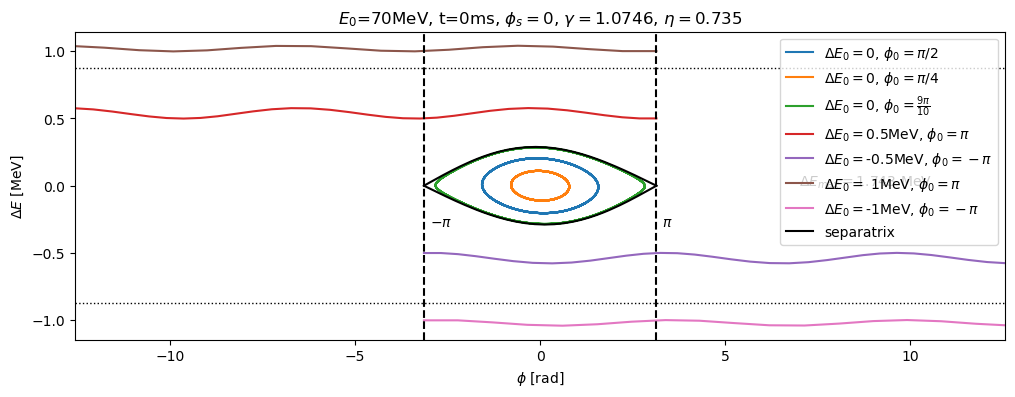

In [134]:
DE_0=0 #initial delta E
V_1= 19000 #19 kV per turn
phi_s=0 #given phase of a synchronous particle
n=500 #number of turns

E_0=70e6 #70MeV initial energy
gamma_0=1.0746 #relativistic gamma factor at E=70MeV (t=0)
eta_0=0.735 #initial slip factor (t=0)

figure(figsize=(12, 4), dpi=100)
coords=run(DE_0=DE_0,phi_0=np.pi/2,phi_s=phi_s,eta=eta_0,E_0=E_0,gamma=gamma_0,V_1=V_1,n=n)
plt.plot(coords[:, 1],coords[:, 0],label=r'$\Delta E_0=0$, $\phi_0=\pi/2$')

coords=run(DE_0=DE_0,phi_0=np.pi/4,phi_s=phi_s,eta=eta_0,E_0=E_0,gamma=gamma_0,V_1=V_1,n=n)
plt.plot(coords[:, 1],coords[:, 0],label=r'$\Delta E_0=0$, $\phi_0=\pi/4$')

coords=run(DE_0=DE_0,phi_0=9/10*np.pi,phi_s=phi_s,eta=eta_0,E_0=E_0,gamma=gamma_0,V_1=V_1,n=n)
plt.plot(coords[:, 1],coords[:, 0],label=r'$\Delta E_0=0$, $\phi_0=\frac{9\pi}{10}$')

coords=run(DE_0=0.5e6,phi_0=np.pi,phi_s=phi_s,eta=eta_0,E_0=E_0,gamma=gamma_0,V_1=V_1,n=n)
plt.plot(coords[:, 1],coords[:, 0],label=r'$\Delta E_0=0.5$MeV, $\phi_0=\pi$')

coords=run(DE_0=-0.5e6,phi_0=-np.pi,phi_s=phi_s,eta=eta_0,E_0=E_0,gamma=gamma_0,V_1=V_1,n=n)
plt.plot(coords[:, 1],coords[:, 0],label=r'$\Delta E_0=$-0.5MeV, $\phi_0=-\pi$')

coords=run(DE_0=1e6,phi_0=np.pi,phi_s=phi_s,eta=eta_0,E_0=E_0,gamma=gamma_0,V_1=V_1,n=n)
plt.plot(coords[:, 1],coords[:, 0],label=r'$\Delta E_0=$ 1MeV, $\phi_0=\pi$')

coords=run(DE_0=-1e6,phi_0=-np.pi,phi_s=phi_s,eta=eta_0,E_0=E_0,gamma=gamma_0,V_1=V_1,n=n)
plt.plot(coords[:, 1],coords[:, 0],label=r'$\Delta E_0=$-1MeV, $\phi_0=-\pi$')

#plot separatrix
coords=run(DE_0=0,phi_0=-np.pi,phi_s=phi_s,eta=eta_0,E_0=E_0,gamma=gamma_0,V_1=V_1,n=n)
plt.plot(coords[:, 1],coords[:, 0],label='separatrix',color='black')
coords=run(DE_0=0,phi_0=np.pi,phi_s=phi_s,eta=eta_0,E_0=E_0,gamma=gamma_0,V_1=V_1,n=n)
plt.plot(coords[:, 1],coords[:, 0],color='black')

plt.axvline(x=np.pi,color='black',linestyle='--')#plot vertical lines at +- pi
plt.axvline(x=-np.pi,color='black',linestyle='--')
plt.text(s=r'$\pi$',x=1.05*np.pi,y=-0.3) #denote += pi in the plot
plt.text(s=r'$-\pi$',x=-0.95*np.pi,y=-0.3)

#some basic plot formatting here
plt.xlim(-4*np.pi,4*np.pi)
plt.title(r'$E_0$=70MeV, t=0ms, $\phi_s=0$, $\gamma=1.0746$, $\eta=0.735$')
plt.ylabel(r'$\Delta E$ [MeV]')
plt.xlabel(r'$\phi$ [rad]')
plt.legend()
plt.savefig('plots/plot2_1.png', bbox_inches='tight', dpi=300)

plt.axhline(y=1.743/2,linestyle='dotted',color='black',linewidth=1) #upper bound of delta E (bunch height)
plt.axhline(y=-1.743/2,linestyle='dotted',color='black',linewidth=1) #lower bound of delta E (bunch height)
plt.text(s=r'$\Delta E_{max} = $1.743 MeV',x=7,y=0)

# Problem 2.2
**For the above problem, pick out the three different types of trajectory and briefly describe the motion in each. Compare to the analogous situation of a simple pendulum.**
***
The three main trajectories would be the "circular" one (or rather the "loopy" one) bound within the black separatrix, and then the unbound trajectories outside of the separatrix, extending to the left (negative $\phi$) and to the right (positive $\phi$). 
These would be analogous to the case of a simple pendulum in the sense that a pendulum that has kinetic energy smaller than the maximum of its potential energy, it swings back and forth (its phase is bound to $-\pi < \phi < \pi$). If its kinetic energy is higher, however, it can swing in full loops and its phase can add up to $\pm \inf$ (assuming no energy loss), with sign depending on the direction of rotation.

# Problem 2.3
**Now assume we’re half-way through acceleration (t = 5 ms) and use the parameters associated with this time-point from problems 1.3 and 1.5. Again, make the assumption that $\eta$, $E_0$, $\beta$ and $\gamma$ are constant over the n turns you are tracking over. (Other key parameters: h = 2, $V_1$ = 150 kV per turn and a sensible number for n). You’ll need to calculate $\phi_s$.
Assume several initial particle co-ordinates $(0, \phi)$, this time in the range $−\pi < \phi < \pi$ and ensure you track a particle with start co-ordinates $(0, \pi − \phi_s − 0.02)$ to approximately trace out the separatrix. Plot out all the particles’ longitudinal phase space trajectories over n turns on one graph.**
***
We know that 
\begin{equation}
\phi_s=\arcsin\left(2\pi R \rho\frac{\dot{B}}{V}\right)
\end{equation}
Now, based on the image and other information given in the assignment, I assume that $B=-\frac{1}{2}(B_{max}-B_{min})\cos(2\pi f t) \implies \dot{B}=2\pi f \frac{1}{2}(B_{max}-B_{min})\sin(2\pi f t)$ where $\frac{1}{2}(B_{max}-B_{min})=(0.700-0.17639)T=0.52361 T$, as calculated in part 1.1, and f=50Hz. This gives $\dot{B}|_{t=5ms}=2\pi \cdot 50\cdot0.52361\cdot\sin(2\pi\cdot 50\cdot 5\cdot10^{-3}) \textrm{ T/s}\simeq 82.25$ T/s, and thus 
\begin{equation}
\phi_s=\arcsin\left(2\pi R \rho\frac{\dot{B}}{V}\right)=\arcsin\left(2\pi\cdot26.01\cdot6.97\cdot\frac{2.255}{150000}\right)\simeq0.675
\end{equation}

Text(7, 0, '$\\Delta E_{max} = $5.545 MeV')

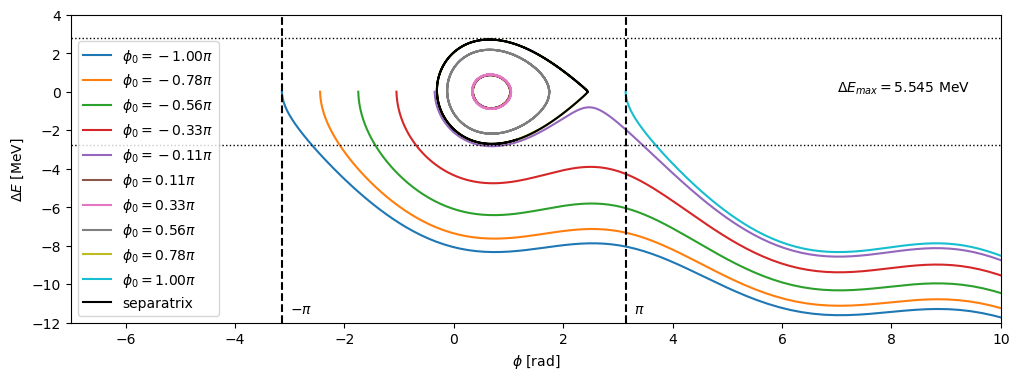

In [131]:
DE_0=0 #initial delta E
V_1= 150000 #150 kV per turn now
phi_s=0.675 #given phase of a synchronous particle
n=500 #number of turns

E_0=435e6 #70MeV initial energy
gamma_0=1.464 #relativistic gamma factor at E=70MeV (t=0)
eta_0=0.487 #initial slip factor (t=0)

figure(figsize=(12, 4), dpi=100)
phi_list=np.linspace(-np.pi,np.pi,10)
for phi_0 in phi_list:
    coords=run(DE_0=DE_0,phi_0=phi_0,phi_s=phi_s,eta=eta_0,E_0=E_0,gamma=gamma_0,V_1=V_1,n=n)
    plt.plot(coords[:, 1],coords[:, 0],label=r'$\phi_0={0:.2f}\pi$'.format(phi_0/np.pi))

#now plot the separatrix:
coords=run(DE_0=0,phi_0=np.pi-phi_s-0.02,phi_s=phi_s,eta=eta_0,E_0=E_0,gamma=gamma_0,V_1=V_1,n=n)
plt.plot(coords[:, 1],coords[:, 0],label='separatrix',color='black')

plt.axvline(x=np.pi,color='black',linestyle='--')#plot vertical lines at +- pi
plt.axvline(x=-np.pi,color='black',linestyle='--')
plt.text(s=r'$\pi$',x=1.05*np.pi,y=-11.5) #denote += pi in the plot
plt.text(s=r'$-\pi$',x=-0.95*np.pi,y=-11.5)

plt.ylabel(r'$\Delta E$ [MeV]')
plt.xlabel(r'$\phi$ [rad]')
plt.xlim(-7,10)
plt.ylim(-12,4)
plt.legend()

plt.axhline(y=5.545/2,linestyle='dotted',color='black',linewidth=1) #upper bound of delta E (bunch height)
plt.axhline(y=-5.545/2,linestyle='dotted',color='black',linewidth=1) #lower bound of delta E (bunch height)
plt.text(s=r'$\Delta E_{max} = $5.545 MeV',x=7,y=0)

# Problem 2.4
 **Calculate the RF bucket height, $\Delta E_{max}$ (energy acceptance) using equation 36 on slide 45 for the cases in 2.1 and 2.3. Compare with the bucket height from your separatrix particle trajectories. (Note that $E_s$ in the equation is the total beam energy: rest mass and kinetic energy.)**
***
The equation is 
\begin{equation}
\left(\frac{\Delta E}{E_0+E_k}\right)_{max}=\sqrt{\frac{qV\beta}{\pi h \eta (E_0+E_k)}(2\cos\phi_s+(2\phi_s-\pi)\sin\phi_s)}
\end{equation}

The following function computes $\Delta E_{max}$:

In [133]:
def delta_E_max(E_0=float,E_k=float,V=float,beta=float,h=float,eta=float,phi_s=float):
    E_s=E_0+E_k
    delta_E_max = E_s*np.sqrt(V*beta/(np.pi*h*eta*E_s)*(2*np.cos(phi_s)+(2*phi_s-np.pi)*np.sin(phi_s)))
    return delta_E_max

dE_max_0=delta_E_max(E_0=938e6,E_k=70e6,V=19e3,beta=0.3662,h=2,eta=0.735,phi_s=0) #calculate delta E_max at t=0
dE_max_5=delta_E_max(E_0=938e6,E_k=435e6,V=150e3,beta=0.7303,h=2,eta=0.344,phi_s=0.675) #calculate delta E_max at t=5ms
print('Delta E (t=0ms) = '+str(round(dE_max_0/1000000,3))+' MeV')
print('Delta E (t=5ms) = '+str(round(dE_max_5/1000000,3))+' MeV')

Delta E (t=0ms) = 1.743 MeV
Delta E (t=5ms) = 5.545 MeV


The calculated bucket height was signified in the plots using horizontal lines